## **Importing Packages**

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import statsmodels.api as sm
import scipy.stats as stats
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

-----

## **Loading the German Dataset**

In [344]:
#Loding the German Dataset
german_data = pd.read_csv("german.data", delimiter=" ", lineterminator="\n", header=None)
german_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [345]:
#Since our original datasest has no header (column/variable names), we proceed to rename our variable based on the meta data provided.
#Name our Variables
german_data.columns = ['Existing_checking_account','Duration_in_month','Credit_history','Purpose','Credit_amount','Savings_account_bonds','Present_employment_since',
                       'Installment_rate','Marital_and_sex','Other_debtors_guarantors','Present_residence','Property','Age','Other_installment_plans','Housing','Existing_credits',
                       'Job','Dependents','Telephone','Foreign_worker',"Credit_Class"]

german_data.head()

,Existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate,Marital_and_sex,Other_debtors_guarantors,...,Property,Age,Other_installment_plans,Housing,Existing_credits,Job,Dependents,Telephone,Foreign_worker,Credit_Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


-----

## **Data Exploration**

In [346]:
#concise summary of our DataFrame's structure and information
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Existing_checking_account  1000 non-null   object
 1   Duration_in_month          1000 non-null   int64 
 2   Credit_history             1000 non-null   object
 3   Purpose                    1000 non-null   object
 4   Credit_amount              1000 non-null   int64 
 5   Savings_account_bonds      1000 non-null   object
 6   Present_employment_since   1000 non-null   object
 7   Installment_rate           1000 non-null   int64 
 8   Marital_and_sex            1000 non-null   object
 9   Other_debtors_guarantors   1000 non-null   object
 10  Present_residence          1000 non-null   int64 
 11  Property                   1000 non-null   object
 12  Age                        1000 non-null   int64 
 13  Other_installment_plans    1000 non-null   object
 14  Housing  

> * From above summary of our dataset, there are no missing values. We also have eight integer variables and 13 categorical variables.

In [347]:
#Checking for duplicate entries in our dataset.
print(sum(german_data.duplicated()))

0


> * We have nil duplicated entries.

In [348]:
#summary of the statistical properties of a dataset.
german_data.describe()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents,Credit_Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [349]:
#value counts for or dependent variable(Credit_class)
print(german_data['Credit_Class'].value_counts())


1    700
2    300
Name: Credit_Class, dtype: int64


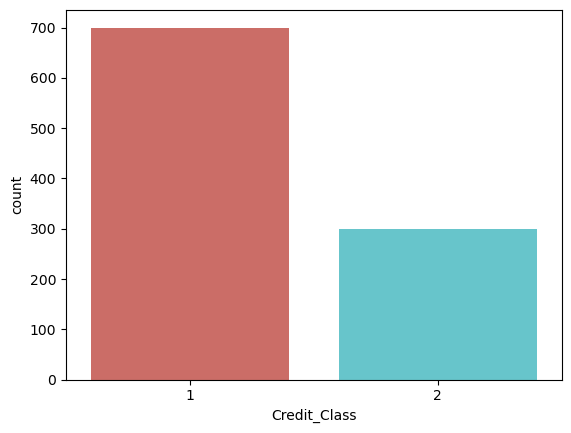

In [350]:
#ploting the unique value counts of dependent variable.
sns.countplot(x='Credit_Class', data=german_data, palette='hls')
plt.show()

> * From above plot and value counts on our dependent variable, our classes are imbalanced. Before proceeding to balance the same, we'll proceed with more data exploration.

In [351]:
#Grouping our numerical variables by the binary dependent variable (Categorical Mean).
german_data.groupby('Credit_Class').mean()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents
Credit_Class,,,,,,,
1,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714
2,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333


> * Age -               The average age of defaulters is slightly Higher than the non-defaulters, which might imply financial strain at a later stage in life.
> * Existing_credits - Defaulters have slightly more credit accounts, which may indicate higher credit risk.
> * Credit_amount & Duration - Non defaulters tend to have larger loans and longer repayment durations.

##### **We can calculate categorical means for other categorical variables such Marital_and_sex and Job**

In [352]:
#categorical mean of numerical variables under the Marital_and_sex variable.
german_data.groupby('Marital_and_sex').mean()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents,Credit_Class
Marital_and_sex,,,,,,,,
A91,21.240000,3684.700000,2.500000,2.660000,38.640000,1.340000,1.060000,1.400000
A92,19.438710,2877.774194,2.829032,2.867742,32.803226,1.325806,1.045161,1.351613
A93,22.237226,3661.903285,3.093066,2.908759,37.687956,1.468978,1.248175,1.266423
A94,17.706522,2045.543478,3.000000,2.489130,30.347826,1.347826,1.021739,1.271739


> * Single males (A93) take larger loans, have higher installment rates, and more dependents, suggesting they may be in a more financially active or risky phase.
> * Married/widowed males (A94) have the lowest credit amounts, lowest dependents, and lowest residence duration, which could imply financial stability or lower financial needs.
> * Females (A92) have moderate credit amounts but relatively good credit class ratings, possibly indicating responsible financial behavior.

In [353]:
#categorical mean of numerical variables under the Job variable.
german_data.groupby('Job').mean()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents,Credit_Class
Job,,,,,,,,
A171,17.363636,2745.136364,2.318182,2.590909,40.090909,1.636364,1.136364,1.318182
A172,16.535000,2358.520000,2.845000,2.865000,36.540000,1.395000,1.260000,1.280000
A173,21.411111,3070.965079,3.009524,2.844444,34.253968,1.406349,1.125397,1.295238
A174,25.168919,5435.493243,3.087838,2.858108,39.027027,1.391892,1.141892,1.344595


> * Higher-skilled and managerial individuals (A174) receive higher loan amounts, longer durations, and higher installment rates, suggesting they are seen as lower-risk borrowers. Unemployed and unskilled individuals (A171) tend to have lower loan amounts and shorter durations, possibly due to perceived financial instability.

##### **Visualizations**

In [354]:
#getting or numerical and categorical independent variables on the dataset.

german_data_indep = german_data.drop(['Credit_Class'],axis=1)

numerical_cols = []
categorical_cols = []

for col in german_data_indep.columns:
    if german_data_indep[col].dtype == 'int64':
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print(numerical_cols)
print(categorical_cols)


['Duration_in_month', 'Credit_amount', 'Installment_rate', 'Present_residence', 'Age', 'Existing_credits', 'Dependents']
['Existing_checking_account', 'Credit_history', 'Purpose', 'Savings_account_bonds', 'Present_employment_since', 'Marital_and_sex', 'Other_debtors_guarantors', 'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone', 'Foreign_worker']


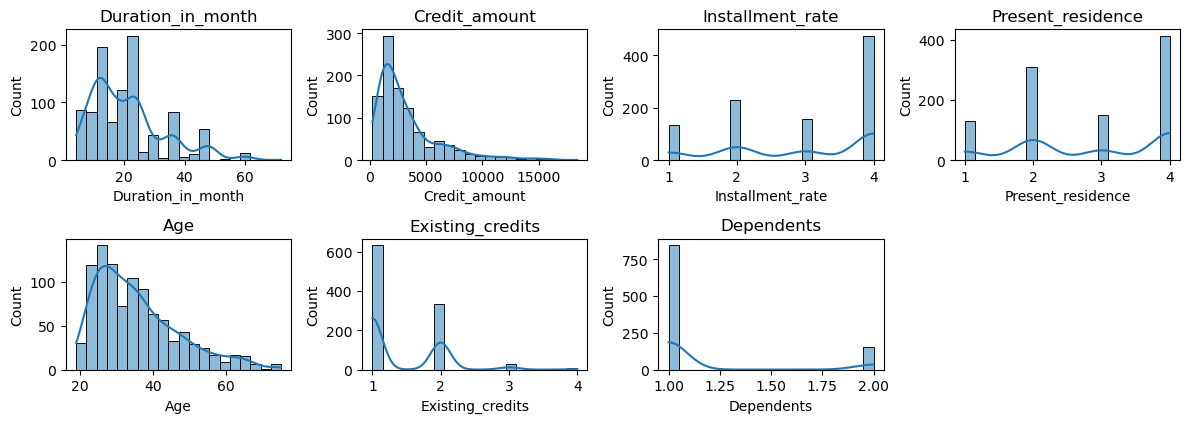

In [355]:
#Plotting Histograms of our numerical variables to understand their distribution.

fig, axes = plt.subplots(3, 4, figsize=(12, 6))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(german_data[numerical_cols]):
    sns.histplot(german_data[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> * Most distributions are right-skewed, indicating that small values are more common while extreme values occur less frequently.
> * The credit amount histogram shows a significant number of smaller loans, with fewer large loans.

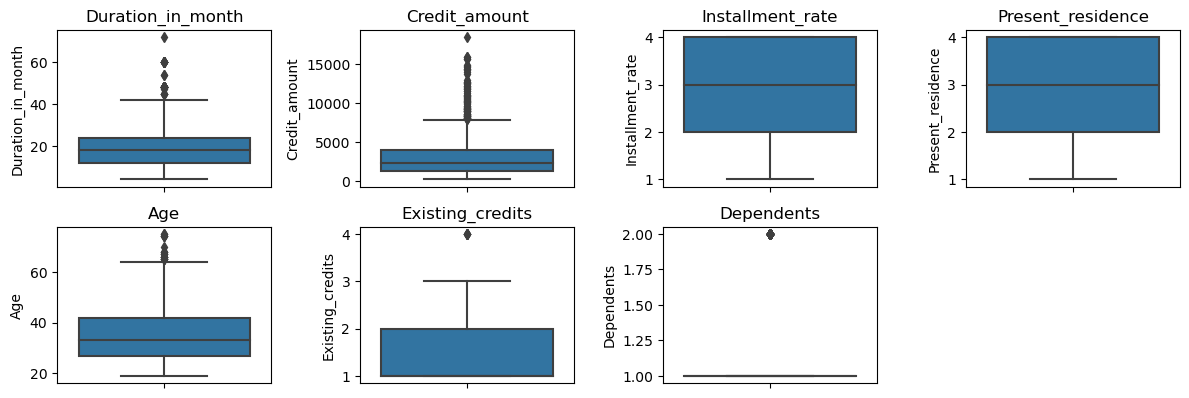

In [356]:
#ploting boxplots of numerical variables to check for outliers.

fig, axes = plt.subplots(3, 4, figsize=(12, 6))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(german_data[numerical_cols]):
    sns.boxplot(y=german_data[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

> * There's some significant outliers in the credit amount, loan duration, and age.
> * However, we will proceed with the outliers in place for us not to lose Valuable Information and important insights.

#### **Eploration of relevance of independent variables to explain the variable Default**
> From the Paper " A logistic regression model for consumer default risk", the authors analyze, using statistical inference techniques, such as the **Mann–Whitney–Wilcoxon** and **Pearson Chi-squared independence tests**, to infer the factors that influence credit risk from a small random sample of customers from a Portuguese banking institution. We will proceed to apply the same to our german dataset.

The nonparametric Mann–Whitney–Wilcoxon test was used to compare the medians of each quantitative variable at 5% significance level.

In [357]:
#Our quantitative variables in the german dataset
quantitative_var = pd.concat([german_data[numerical_cols],german_data['Credit_Class']],axis=1)
quantitative_var.head()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents,Credit_Class
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


In [358]:
quantitative_var.iloc[:, :7]

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [359]:
# Define the two groups based on "Credit_Class"
group_1 = quantitative_var[quantitative_var["Credit_Class"] == 1]
group_2 = quantitative_var[quantitative_var["Credit_Class"] == 2]

# Select only numerical columns for testing (excluding index and class column)
num_columns = quantitative_var.columns[0:-1]

# Perform Mann-Whitney U test for each numerical column
results = {}

for col in num_columns:
    stat, p_value = stats.mannwhitneyu(group_1[col], group_2[col], alternative='two-sided')
    results[col] = {"U-statistic": stat, "p-value": round(p_value,6)}

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index")

# Display results
print(results_df)

                   U-statistic   p-value
Duration_in_month      77995.5  0.000000
Credit_amount          93480.0  0.005918
Installment_rate       95889.5  0.019860
Present_residence     104680.5  0.935782
Age                   119833.0  0.000391
Existing_credits      110272.0  0.134819
Dependents            105250.0  0.924236


> * From above results we observe that Features like **"Duration_in_month"**, **"Credit_amount"**, **"Installment_rate"**, and **"Age"** show statistically significant differences between the  two credit classes (𝑝<0.05).
> * Features like **"Present_residence"**, **"Existing_credits"**, and **"Dependents"** do not show significant differences.

Pearson Chi-squared independence test was used to check if the qualitative variables have some influence on the probability of occurring a default.

In [360]:
#Our qualitative variables in the german dataset
qualitative_var = german_data[categorical_cols]
qualitative_var.head()

,Existing_checking_account,Credit_history,Purpose,Savings_account_bonds,Present_employment_since,Marital_and_sex,Other_debtors_guarantors,Property,Other_installment_plans,Housing,Job,Telephone,Foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [361]:
# Independent variable (Target)
target = german_data['Credit_Class']

# List to store results
results = []

# Loop over all categorical variables (except the Target)
for var in qualitative_var.columns:
        # Create a contingency table between the independent variable and the categorical variable
        contingency_table = pd.crosstab(target, qualitative_var[var])
        
        # Perform the Chi-squared test of independence
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        
        # Append the result to the results list
        results.append({
            'Variable': var,
            'Chi-squared Statistic': chi2,
            'P-value': p,
            'Degrees of Freedom': dof
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results table
results_df

,Variable,Chi-squared Statistic,P-value,Degrees of Freedom
0,Existing_checking_account,123.720944,1.218902e-26,3
1,Credit_history,61.691397,1.279187e-12,4
2,Purpose,33.356447,1.157491e-04,9
3,Savings_account_bonds,36.098928,2.761214e-07,4
4,Present_employment_since,18.368274,1.045452e-03,4
5,Marital_and_sex,9.605214,2.223801e-02,3
6,Other_debtors_guarantors,6.645367,3.605595e-02,2
7,Property,23.719551,2.858442e-05,3
8,Other_installment_plans,12.839188,1.629318e-03,2
9,Housing,18.199842,1.116747e-04,2


> * Above results show that at 5% significance level, all categorical variables except **"Job"** and **"Telephone"** have signifgicant relationship with the credit default risk.

-----

## **Data Preprocessing**

In [362]:
#Defining our dependent and indepenent variables.
Y = german_data['Credit_Class']
X = german_data.drop('Credit_Class',axis=1)

##### Dealing with categorical variables. 

In [363]:
#defining our X_train categorical dataframe.
X_categorical = X[categorical_cols]

#OneHotEncoder can be used to correct categorical variables into dummy one-hot encoded variables.

ohe = OneHotEncoder(handle_unknown="ignore",sparse=False, drop='first')
ohe.fit(X_categorical)

X_ohe = pd.DataFrame(
    ohe.transform(X_categorical),

    #index is important to ensure we can concatenate with other columns.
    index = X_categorical.index,

    #We are dummmying multiple columns at once, so stack the names.
    columns = ohe.get_feature_names_out(categorical_cols)

)
X_ohe

,Existing_checking_account_A12,Existing_checking_account_A13,Existing_checking_account_A14,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A41,Purpose_A410,Purpose_A42,...,Property_A124,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_worker_A202
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


##### Dealing With Numerical Data (Normalisation)

In [364]:
#defining our X_train categorical dataframe.
X_numerical = X[numerical_cols]

#Using the MinMaxScaler Scaler to create a maximum value of 1 and a minimum value of 0. This will work well with our binary OHE.

scaler = MinMaxScaler()

scaler.fit(X_numerical)

X_scaled = pd.DataFrame(
    scaler.transform(X_numerical),

    #index is important to ensure we can concatenate with other columns.
    index = X_numerical.index,
    columns = X_numerical.columns
)
X_scaled

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0
...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0


In [365]:
#concatenating everything together.
X_full = pd.concat([X_scaled, X_ohe], axis=1)
X_full.head()

,Duration_in_month,Credit_amount,Installment_rate,Present_residence,Age,Existing_credits,Dependents,Existing_checking_account_A12,Existing_checking_account_A13,Existing_checking_account_A14,...,Property_A124,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### **Multicollinearity Check**
Logistic regression can be sensitive to multicollinearity hence we consider checking Variance Inflation Factor (VIF) for predictors:

In [366]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Suppose df is your DataFrame with independent variables only
# (exclude the dependent variable)

# Optional: Add a constant term for intercept
X = add_constant(X_full)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.to_csv('vif.csv')

------

## **Modelling**

#### **Model 1: using all predictor variables**

##### **Train_test split**.

In [367]:
from sklearn.model_selection import train_test_split

#spiting our dataset to 80/20 as per the paper.
#specifying the random_state means we will get consistent results even if the kernel is restarted(Reproducibility)
X_train, X_test, Y_train, Y_test = train_test_split(X_full, target, test_size=0.2, random_state=0)


#### **Handling Class Imbalance**

In [368]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [369]:
#statsmodels for logistic regression since we need detailed statistical analysis and inference

# Prepare the independent variables and add the constant (intercept)
X_train_const = sm.add_constant(X_train_resampled)

#Since logistic regression expects the target variable to be binary, you may want to transform the values so that 0 represents no default and 1 represents a default.
Y_train_transform = Y_train_resampled.map({2: 0, 1: 1})

# Fit the logistic regression model
model1 = sm.Logit(Y_train_transform, X_train_const)
result1 = model1.fit()

# Print the summary of the model, including Wald test statistics
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.423591
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Credit_Class   No. Observations:                 1116
Model:                          Logit   Df Residuals:                     1067
Method:                           MLE   Df Model:                           48
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.3889
Time:                        18:10:23   Log-Likelihood:                -472.73
converged:                       True   LL-Null:                       -773.55
Covariance Type:            nonrobust   LLR p-value:                 9.478e-97
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.2806      1.033     -1.240      0.

#### **Model 1 Evaluation**

In [370]:
#Model 1 Akaike Information Criterion (AIC)
print("AIC:", result1.aic)

AIC: 1043.4554891586108


              precision    recall  f1-score   support

           0       0.50      0.66      0.57        58
           1       0.84      0.73      0.78       142

    accuracy                           0.71       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.74      0.71      0.72       200

ROC AUC Score: 0.7135745507527926


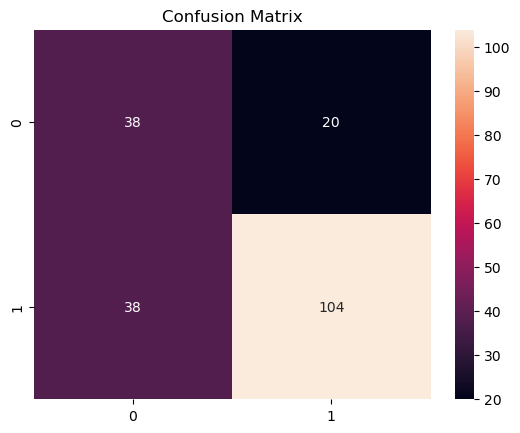

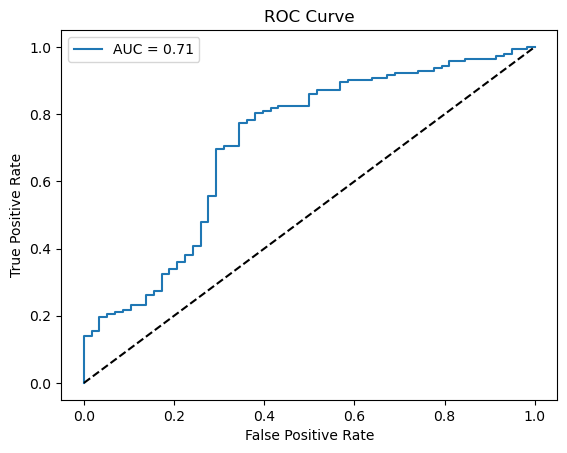

In [371]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities and classes
X_test_const = sm.add_constant(X_test)
Y_test_transform = Y_test.map({2: 0, 1: 1})
Y_pred_prob = result1.predict(X_test_const)
Y_pred_class = (Y_pred_prob >= 0.5).astype(int)

# Classification report
print(classification_report(Y_test_transform, Y_pred_class))
print("ROC AUC Score:", roc_auc_score(Y_test_transform, Y_pred_prob))

# Confusion matrix
sns.heatmap(confusion_matrix(Y_test_transform, Y_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(Y_test_transform, Y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(Y_test_transform, Y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

-----

#### **Model 2: Based on significant features from EDA/statistical tests**

In [373]:
#droping the variables that did not show statistical significanct differences between the  two credit classes

words = ["Job","Telephone","Present_residence","Existing_credits","Dependents"]

X_full2 = X_full.copy()
for col in X_full2.columns:
    if any(word in col for word in words):
        X_full2.drop(col, axis=1,inplace=True)

In [374]:
# Re-split and refit the model
X_train_eda, X_test_eda, Y_train_eda, Y_test_eda = train_test_split(X_full2, target, test_size=0.2, random_state=0)
X_train_eda_resampled, Y_train_eda_resampled = SMOTE(random_state=42).fit_resample(X_train_eda, Y_train_eda)
Y_train_eda_bin = Y_train_eda_resampled.map({2: 0, 1: 1})
X_train_eda_const = sm.add_constant(X_train_eda_resampled)
model_eda = sm.Logit(Y_train_eda_bin, X_train_eda_const).fit()
print(model_eda.summary())

Optimization terminated successfully.
         Current function value: 0.441734
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Credit_Class   No. Observations:                 1116
Model:                          Logit   Df Residuals:                     1074
Method:                           MLE   Df Model:                           41
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.3627
Time:                        18:13:11   Log-Likelihood:                -492.98
converged:                       True   LL-Null:                       -773.55
Covariance Type:            nonrobust   LLR p-value:                 1.521e-92
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7366      0.826     -3.314      0.

#### **Model 2 Evaluation**

In [375]:
#Model 3 Akaike Information Criterion (AIC)
print("AIC:", model_eda.aic)

AIC: 1069.9506456444078


              precision    recall  f1-score   support

           0       0.52      0.66      0.58        58
           1       0.84      0.75      0.80       142

    accuracy                           0.73       200
   macro avg       0.68      0.70      0.69       200
weighted avg       0.75      0.72      0.73       200

ROC AUC Score: 0.7264448761534725


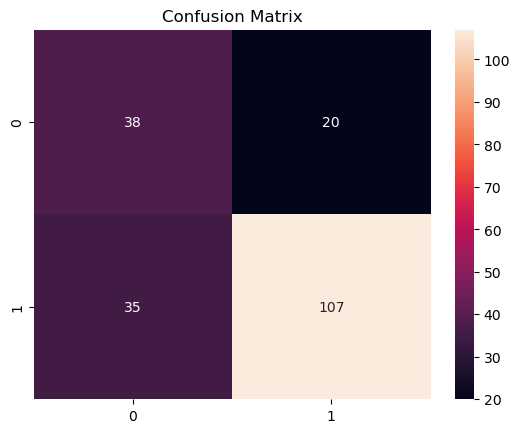

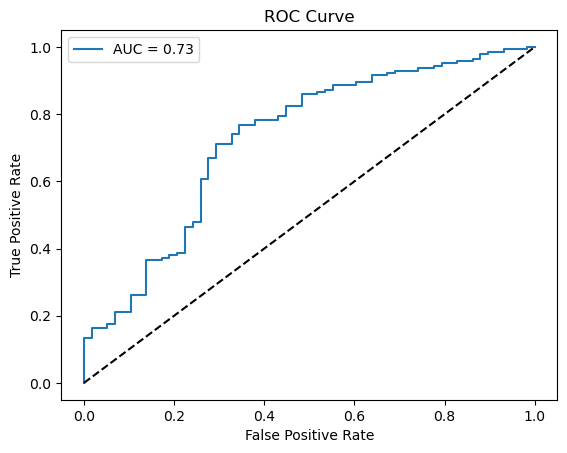

In [376]:
# Predict probabilities and classes
X_test_eda_const = sm.add_constant(X_test_eda)
Y_test_eda_transform = Y_test_eda.map({2: 0, 1: 1})
Y_eda_pred_prob = model_eda.predict(X_test_eda_const)
Y_eda_pred_class = (Y_eda_pred_prob >= 0.5).astype(int)

# Classification report
print(classification_report(Y_test_eda_transform, Y_eda_pred_class))
print("ROC AUC Score:", roc_auc_score(Y_test_eda_transform, Y_eda_pred_prob))

# Confusion matrix
sns.heatmap(confusion_matrix(Y_test_eda_transform, Y_eda_pred_class), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(Y_test_eda_transform, Y_eda_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(Y_test_eda_transform, Y_eda_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

---

#### **Model 3: Penalized logistic regression (to handle overfitting, improve generalization, and multicollinearity)**

In [439]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, Y_train, Y_test = train_test_split(X_full, target, test_size=0.2, random_state=0)

# Standardize the data (important for penalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Y_train_transform = Y_train.map({2: 0, 1: 1})
Y_test_transform = Y_test.map({2: 0, 1: 1})

#Fit Penalized Logistic Regression
# Use LogisticRegressionCV for automatic tuning of regularization strength (C)
# 'l1' = Lasso
model_pen = LogisticRegressionCV(
    cv=5,
    penalty='l1',                  
    solver='saga',                 # Required for L1 or ElasticNet
    scoring='roc_auc',             
    max_iter=10000,
    random_state=42
)

model_pen.fit(X_train_scaled, Y_train_transform)

LogisticRegressionCV(cv=5, max_iter=10000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='saga')

#### **Model 3 Evaluation**

In [440]:
#Evaluate the Model
y_pred = model_pen.predict(X_test_scaled)
y_prob = model_pen.predict_proba(X_test_scaled)[:, 1]

print(classification_report(Y_test_transform, y_pred))
print("AUC:", roc_auc_score(Y_test_transform, y_prob))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        58
           1       0.83      0.84      0.83       142

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.76      0.76      0.76       200

AUC: 0.7297231665857212


In [441]:
import numpy as np

def compute_aic_sklearn(model, X, y):
    """
    Approximate AIC from sklearn LogisticRegression model.
    """
    from sklearn.metrics import log_loss
    n = X.shape[0]
    k = np.count_nonzero(model.coef_) + 1  # Non-zero coefficients + intercept
    ll = -log_loss(y, model.predict_proba(X), normalize=False)
    return 2 * k - 2 * ll

aic = compute_aic_sklearn(model_pen, X_test_scaled, Y_test_transform)
print("Approximate AIC:", aic)

Approximate AIC: 309.19995773250525


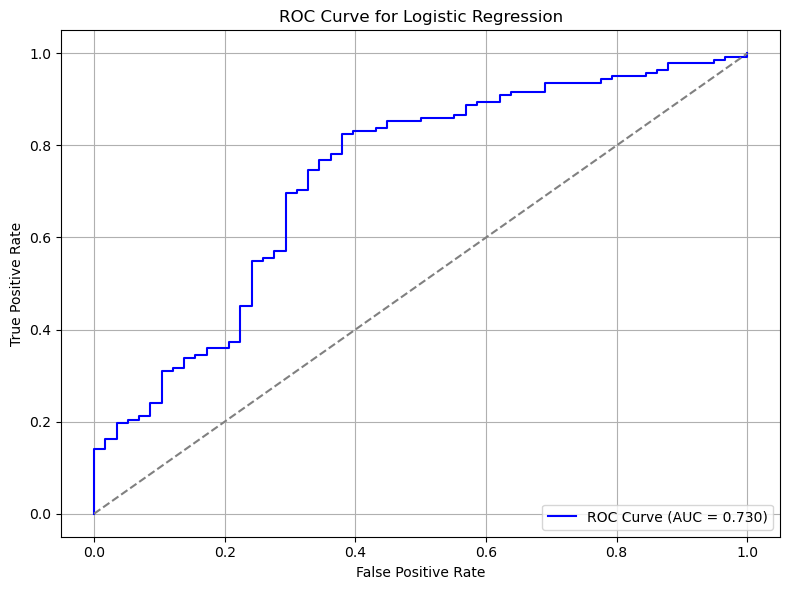

In [442]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_transform, y_prob)

# Compute AUC
auc_score = roc_auc_score(Y_test_transform, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

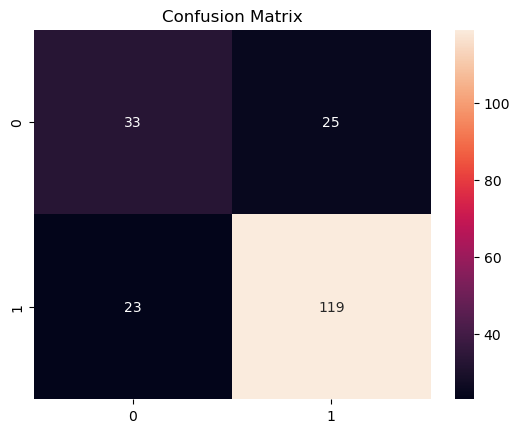

In [443]:
# Confusion matrix
sns.heatmap(confusion_matrix(Y_test_transform, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [432]:
# Get the intercept
intercept = model_pen.intercept_[0]  # Scalar value

print(f"Intercept (β₀): {intercept}")

Intercept (β₀): 1.192398227079978


In [433]:
# Get non-zero coefficients
coef = model_pen.coef_[0]
selected_features = pd.Series(coef, index=X_full.columns)
significant_features = selected_features[selected_features != 0]

print("Significant variables:")
print(significant_features)

Significant variables:
Duration_in_month               -0.415702
Credit_amount                   -0.287541
Installment_rate                -0.316537
Present_residence               -0.011410
Age                              0.067633
Existing_credits                -0.110301
Dependents                      -0.110121
Existing_checking_account_A12    0.178310
Existing_checking_account_A13    0.224737
Existing_checking_account_A14    0.785378
Credit_history_A31              -0.084551
Credit_history_A32               0.270590
Credit_history_A33               0.237523
Credit_history_A34               0.592697
Purpose_A41                      0.529089
Purpose_A410                     0.130796
Purpose_A42                      0.228712
Purpose_A43                      0.327079
Purpose_A46                     -0.006833
Purpose_A48                      0.153915
Purpose_A49                      0.126434
Savings_account_bonds_A62        0.045242
Savings_account_bonds_A63        0.025924
Savings_acc

---

### **Apllying our Optimum model (Penalized logistic regression) to our original full dataset**

In [414]:
# Standardize the data (important for penalization)
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)
target_transform = target.map({2: 0, 1: 1})


#Evaluate the Model
y_full_pred = model_pen.predict(X_full_scaled)
y_full_prob = model_pen.predict_proba(X_full_scaled)[:, 1]

print(classification_report(target_transform, y_full_pred))
print("AUC:", roc_auc_score(target_transform, y_full_prob))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       300
           1       0.82      0.89      0.85       700

    accuracy                           0.78      1000
   macro avg       0.75      0.71      0.72      1000
weighted avg       0.77      0.78      0.78      1000

AUC: 0.8292999999999999


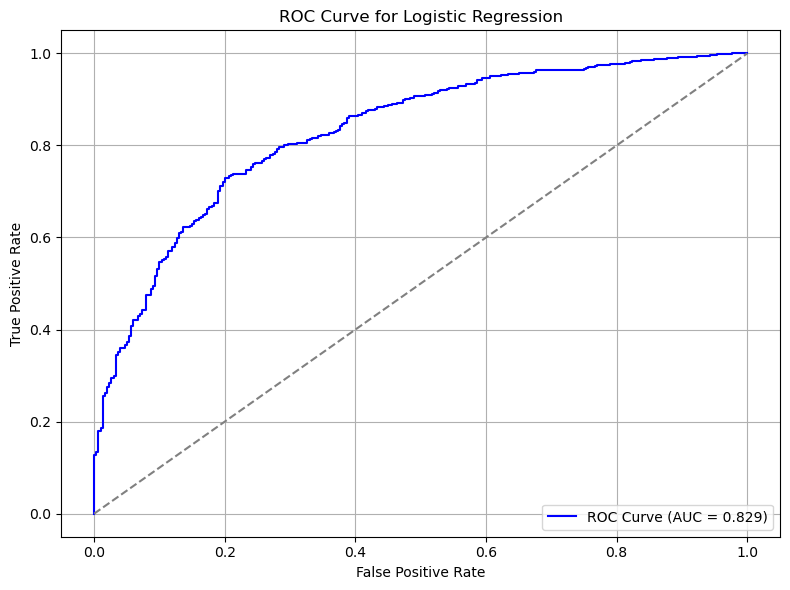

In [415]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(target_transform, y_full_prob)

# Compute AUC
auc_score = roc_auc_score(target_transform, y_full_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

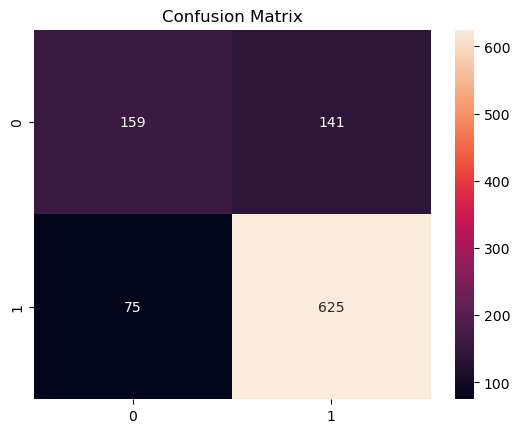

In [423]:
# Confusion matrix
sns.heatmap(confusion_matrix(target_transform, y_full_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

----

#### **Model 4: Testing for interactions between variables**

##### Identify Significant Variables from First Model

In [445]:
# Get feature names if X is a DataFrame
feature_names = X_train.columns

# Extract coefficients from the trained model
coef = model_pen.coef_.flatten()

# Select features with non-zero coefficients
significant_features = feature_names[coef != 0]
print("Significant features:", list(significant_features))

Significant features: ['Duration_in_month', 'Credit_amount', 'Installment_rate', 'Present_residence', 'Age', 'Existing_credits', 'Dependents', 'Existing_checking_account_A12', 'Existing_checking_account_A13', 'Existing_checking_account_A14', 'Credit_history_A31', 'Credit_history_A32', 'Credit_history_A33', 'Credit_history_A34', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_account_bonds_A62', 'Savings_account_bonds_A63', 'Savings_account_bonds_A64', 'Savings_account_bonds_A65', 'Present_employment_since_A72', 'Present_employment_since_A73', 'Present_employment_since_A74', 'Marital_and_sex_A93', 'Marital_and_sex_A94', 'Other_debtors_guarantors_A102', 'Other_debtors_guarantors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_installment_plans_A142', 'Other_installment_plans_A143', 'Housing_A152', 'Housing_A153', 'Job_A172', 'Job_A174', 'Telephone_A192', 'Foreign_worker_A202']


##### Generate Interaction Terms Between Significant Features Only

In [446]:
from sklearn.preprocessing import PolynomialFeatures

# Subset X to significant features
X_sig = X_full[significant_features]

# Split again using only significant variables
X_train_sig, X_test_sig, Y_train, Y_test = train_test_split(X_sig, target, test_size=0.2, random_state=0)

# Transform Y
Y_train_transform_int = Y_train.map({2: 0, 1: 1})
Y_test_transform_int = Y_test.map({2: 0, 1: 1})

# Generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interact = poly.fit_transform(X_train_sig)
X_test_interact = poly.transform(X_test_sig)

# Convert to DataFrame with proper column names
X_train_df = pd.DataFrame(X_train_interact, columns=poly.get_feature_names_out(significant_features), index=X_train_sig.index)
X_test_df = pd.DataFrame(X_test_interact, columns=poly.get_feature_names_out(significant_features), index=X_test_sig.index)

##### Fit New Penalized Model on Interactions

In [447]:
# Standardize
scaler = StandardScaler()
X_train_scaled_int = scaler.fit_transform(X_train_df)
X_test_scaled_int = scaler.transform(X_test_df)

# Refit penalized model
model_interact = LogisticRegressionCV(
    cv=5,
    penalty='l1',
    solver='saga',
    scoring='roc_auc',
    max_iter=10000,
    random_state=42
)

model_interact.fit(X_train_scaled_int, Y_train_transform_int)

# Evaluate
print("ROC AUC Score:", roc_auc_score(Y_test_transform_int, model_interact.predict_proba(X_test_scaled_int)[:, 1]))
print(classification_report(Y_test_transform_int, model_interact.predict(X_test_scaled_int)))

ROC AUC Score: 0.7550995628946091
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        58
           1       0.77      0.92      0.84       142

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



In [ ]:
aic = compute_aic_sklearn(model_interact, X_test_scaled_int, Y_test_transform_int)
print("Approximate AIC:", aic)

Approximate AIC: 319.83862841192376


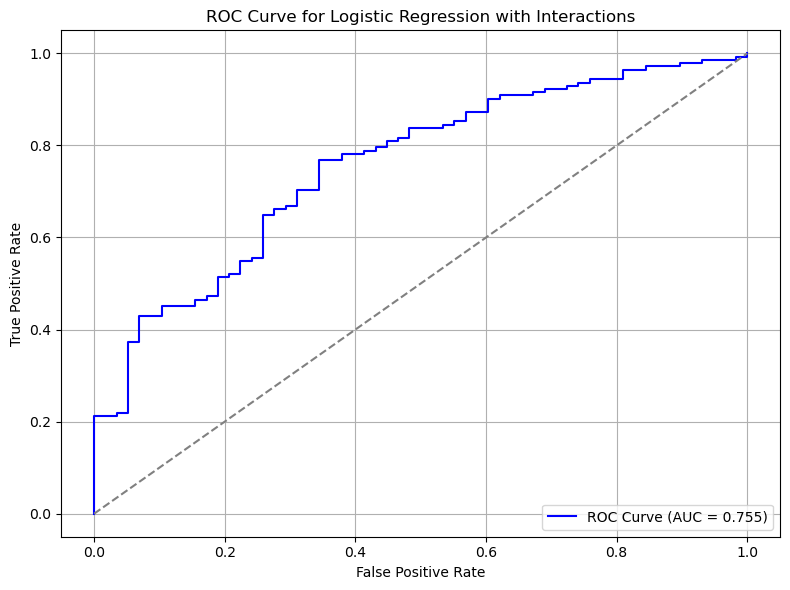

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1)
y_full_prob = model_interact.predict_proba(X_test_scaled_int)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_transform_int, y_full_prob)

# Compute AUC
auc_score = roc_auc_score(Y_test_transform_int, y_full_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with Interactions')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----

### **Goodness-of-fit test**

Interpreting a calibration curve helps us assess how well a logistic regression model’s predicted probabilities reflect the true likelihood of the event.

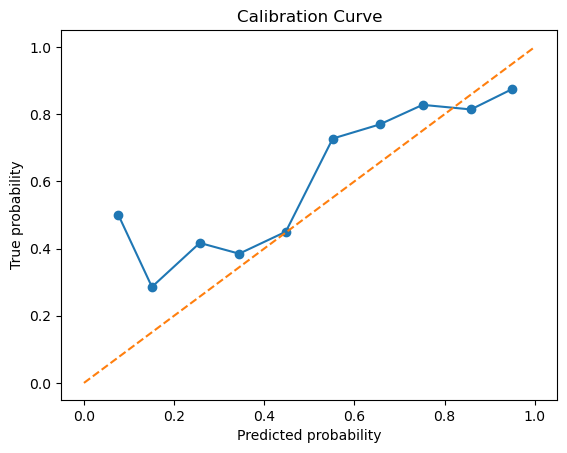

In [438]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true, prob_pred = calibration_curve(Y_test_transform, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.show()

* Calibration Quality:

The model is poorly calibrated at low predicted probabilities (0.0–0.4), where it overestimates the likelihood of positive outcomes.

From 0.5 onward, the model's predictions are closer to the true observed probabilities, although they tend to be slightly underconfident (i.e., underestimating actual outcomes).

* Implications:

This means your model’s raw probabilities, particularly at the low end, are not well-aligned with reality and should not be directly trusted for decision-making in that range.

However, the model still shows an overall increasing trend, suggesting it maintains decent ranking ability (discrimination).

---

### **Residuals analysis**

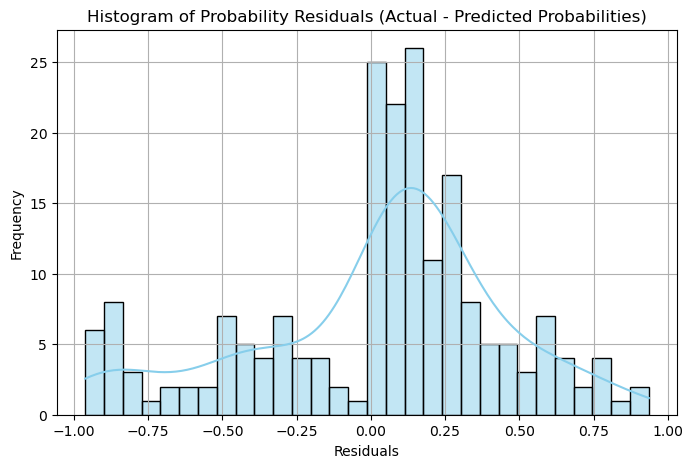

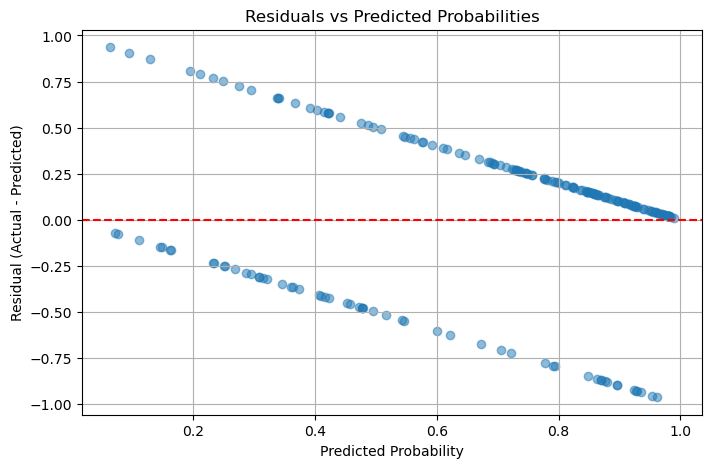

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. Compute residuals (probability residuals)
residuals = Y_test_transform.values - y_prob

# 2. Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Probability Residuals (Actual - Predicted Probabilities)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 3. Residuals vs Predicted Probabilities
plt.figure(figsize=(8, 5))
plt.scatter(y_prob, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()

**Plot 1: Histogram of Probability Residuals (Actual - Predicted)**

This histogram visualizes the distribution of residuals — the differences between actual outcomes (0 or 1) and predicted probabilities from the logistic regression model.

**Observations:**

* The residuals are mostly centered around 0, indicating that the model makes many predictions that are close to the actual outcomes.
* There is noticeable skewness and multimodality in the distribution:
* A concentration of positive residuals around 0.2 suggests some underprediction.
* A tail toward the negative side indicates overprediction in some cases.
* The residuals are not symmetrically distributed, hinting at potential miscalibration in parts of the probability range.

**Conclusion from Plot 1:**

* The model is generally performing decently but is likely miscalibrated or biased in certain regions of the probability space.
* There may be room to improve the model’s probability calibration, possibly with techniques like Platt scaling or isotonic regression.

**Plot 2: Residuals vs. Predicted Probabilities**
This scatter plot shows residuals against the predicted probabilities.

**Observations:**

There are two clear linear bands:

> * One band with residuals ≈ 1 - predicted probability (when actual = 1).
> * One band with residuals ≈ -predicted probability (when actual = 0).

* These patterns are expected in logistic regression because the residuals for binary classification are either (1 - p) or (0 - p).
* No strong funnel shape or curvature is visible, which would indicate heteroskedasticity or nonlinear relationships.
* The spread of residuals is fairly uniform, showing no strong evidence of heteroskedasticity.

**Conclusion from Plot 2:**

* The structure is typical and expected for logistic regression residuals.
* The model does not appear to have major heteroskedasticity issues.
* However, clustering near extreme probabilities might suggest overconfidence in some predictions.